<a href="https://colab.research.google.com/github/MananShukla7/TensorFlow-NLP/blob/main/01_intro_tf_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intoduction to NLP Fundamentals in TensorFlow

NLP is used to make sense of the textual data with not so textual methods!
THings like tokenization,embeddings etc are used

In [1]:
## Check for CPU


In [2]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-3bb5f4b4-0511-30b2-1fa2-d9e2007a2187)


In [3]:
#Import helper func


#Get a text dataset

The dataset that we are using is kaggles intro to nlp dataset
(Tweets wether they are disaster or not disaster).config/

Source-https://www.kaggle.com/c/nlp-getting-started

In [4]:

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-05-27 06:30:13--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  1.29MB/s    in 0.4s    

2023-05-27 06:30:13 (1.29 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [5]:
import zipfile
def unzip_data(filename):
  zip_ref=zipfile.ZipFile(filename,"r")
  zip_ref.extractall()
  zip_ref.close()


In [6]:
#Ubzip data
unzip_data("/content/nlp_getting_started.zip")

In [7]:
import pandas as pd
df=pd.read_csv("/content/train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
df.shape

(7613, 5)

In [9]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [10]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
df_shuffle=df.sample(frac=1,random_state=42)
df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [14]:
#HOw many examples of each class are there
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
df.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [16]:
test_df=pd.read_csv("/content/test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#Visualizing a text dataset

In [17]:
#How many total samples??
len(df),len(test_df)

(7613, 3263)

In [18]:
class_names=["not a real disaster","real disaster"]

#Lets visualize some random training examples!

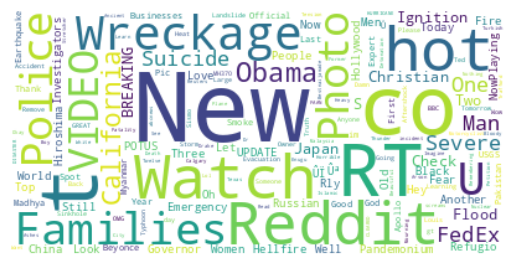

In [19]:
#Creating the world could of tweets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(cat.split()[0] for cat in df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import random 
i=0
random_index=random.randint(0,len(df)-5)
for row in df_shuffle[["text","target"]][i:i+10].itertuples():
  _,text,target=row
  print(f"Target:{target}","{real disaster}" if target>0 else "{Not real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")
  


Target:1 {real disaster}
Text:
So you have a new weapon that can cause un-imaginable destruction.

---

Target:0 {Not real disaster}
Text:
The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@

---

Target:1 {real disaster}
Text:
DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q

---

Target:0 {Not real disaster}
Text:
Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.

---

Target:0 {Not real disaster}
Text:
in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3

---

Target:0 {Not real disaster}
Text:
@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time

---

Target:1 {real disaster}
Text:
my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am 

###Split into training and validation sets


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df_shuffle['text'].to_numpy(),df_shuffle['target'].to_numpy(),test_size=0.1,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((6851,), (762,), (6851,), (762,))

In [22]:
X_train[:10],y_train[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text into numbers

When dealing with a text problem, one od the first things is to convert text to numbers.

There area few ways to do this, namely:
- Tokenization - direct mapping of token(a token could be a word or a character) to number

- Embedding- create a embedding layer that will create a dense and small matrix with feature vector for each word or character
we can create a feature vector of man gamti size

##Text vectorization (tokenization)

In [23]:
X_train[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorization=TextVectorization(max_tokens=10000,#None gives error when pad_to+max set to none
                                     standardize="lower_and_strip_punctuation",
                                     split="whitespace",
                                     ngrams=None ,#Create group of n words if none then treats each word on its own
                                     output_mode="int",
                                     output_sequence_length=None, #Pads the all sentences to longest tweets! none means does it to the max length of sentence is value like 8 is set then pads 8 0s to the sentence!!
                                     pad_to_max_tokens=True 
                                     )


In [25]:
#FInd the avg number of tokens in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [26]:
#Setup the text vectorization variable
max_vocab_length=10000
max_length=15

text_vectorization=TextVectorization(max_tokens=max_vocab_length,
                                     output_mode="int",
                                     output_sequence_length=max_length)

In [27]:
#adapt==fit
text_vectorization.adapt(X_train)

In [28]:
sample_sentence="There's a flood on my street ahhh!!"
text_vectorization([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,  11,  13, 698,   1,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [29]:
#Choose trandom samples from training dataset and tokenize it.
random_sentence=random.choice(X_train)
print(f"Sentence is : {random_sentence}\n")
v=text_vectorization(random_sentence)
v

Sentence is : #news Britons rescued amid Himalaya floods http://t.co/kEPznhXHXd



<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([  58, 6061,  388,  714, 5481,  207,    1,    0,    0,    0,    0,
          0,    0,    0,    0])>

In [30]:
#Get the unique words in the vocabulary
words_in_the_vocab=text_vectorization.get_vocabulary()
top_5_words=words_in_the_vocab[:5]
bottom_5_words=words_in_the_vocab[-5:]
print(f"top 5 words: {top_5_words}")
print(f"least 5 words: {bottom_5_words}")
print(f"total words: {len(words_in_the_vocab)}")

top 5 words: ['', '[UNK]', 'the', 'a', 'in']
least 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']
total words: 10000


In [31]:
words_in_the_vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

###Creating the embedding
turns a positive integer matrix to dense float matrix
To make our embedding we are going to use the tf embedding layer

The parameter that we care most about for our embedding layer:
- `input_dim`=THe size of our vocab_length

- `output_dim`=THe o/p size of our embedding layer 100 the 100 dims

- `input_lenght`= Length of the sequence being passed to the embedding layer

In [32]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length, #10000
                 output_dim=128,
                 input_length=max_length)#15
            

In [33]:
random_sentence=random.choice(X_train)
vectorized=text_vectorization(random_sentence)
embedded=embedding(vectorized)
print(f"Original Sentence: {random_sentence}")
print(f"Vectorized Sentence: {vectorized}")
print(f"Word embedded sentence:\n {embedded}")

Original Sentence: @aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.
Vectorized Sentence: [6199 4431    2   36    6  783  250  109    4   90  151    4    2  186
  453]
Word embedded sentence:
 [[-0.00266214  0.0497666   0.01641226 ...  0.01376876 -0.00112327
  -0.04003019]
 [ 0.02056291 -0.01851591  0.04499603 ...  0.02960544 -0.04109873
  -0.04372981]
 [ 0.00455347 -0.03443649 -0.00903156 ... -0.00880519  0.01368021
  -0.01725075]
 ...
 [ 0.00455347 -0.03443649 -0.00903156 ... -0.00880519  0.01368021
  -0.01725075]
 [ 0.01705681 -0.00585313  0.03768608 ... -0.04409499 -0.02682352
  -0.03280731]
 [-0.02899798  0.01133617  0.00854744 ...  0.03737923  0.02850319
   0.03175589]]


In [34]:
#CHeck out  a single token's embedding

embedded[0][0],embedded.shape,random_sentence

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.0026621446>,
 TensorShape([15, 128]),
 '@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.')

#Modelling experiments on our dataset

Now we've a got a way to turn our text sequence into tthe numbers, its time to start
building a series of modelling experiments

We will build and train following models:

* Model 0: Naive Bayed(baseline), (from sklearn)
* Model 1: Feed-forward neural network(dense model or linear in pytorch)
* Model 2:LSTM model(RNN)
* Model 3:GRU(RNN)
* Model 4:Bi-directional LSTM model(RNN)
* Model 5 :1D Convo NN
* Model 6: Tensorflow hub pretrained Feature extractor(using the transfer learing for nlp)
* Model 7:Same as the model 6 but with the 10 percent of the data

How are we going to approach all this??

* Create a model
* Build a model
* FIt a model
* Evaluate a model
* Predict based on the model!!

##Building a baseline model (Model 0)

---
As with all the ml modelling a=experiments ,we need to create a baseline to compare latter models with and get better idea about the working!!

> **NOTE:** Very common to use non dl models to use as baseline coz of the speed and then later using the dl to see if we can improve upone them!!


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics


In [36]:
tf_vectorize=CountVectorizer()
X_train_tf=tf_vectorize.fit_transform(X_train)
X_train_tf.shape

(6851, 20076)

In [37]:
X_val_tf=tf_vectorize.transform(X_val)

In [38]:
X_test_tf=tf_vectorize.transform(test_df['text'])

In [39]:
tfidfVectorize=TfidfVectorizer()
X_train_idf=tfidfVectorize.fit_transform(X_train)
X_train_idf.shape

(6851, 20076)

In [40]:
bayesian=MultinomialNB()
bayesian.fit(X_train_tf,y_train)

MultinomialNB()

###Evaluating model using the validation set

In [41]:
y_val_pred_0=bayesian.predict(X_val_tf)

In [42]:
metrics.confusion_matrix(y_val,y_val_pred_0)

array([[370,  44],
       [103, 245]])

In [43]:
tf_score=bayesian.score(X_val_tf,y_val) ##Approx 80 percent accuracy!
tf_score

0.8070866141732284

In [44]:
def check_val(y_val,y_pred):
  from numpy import random
  samples=random.randint(0,len(y_val),size=[10])
  for sample in samples:
    print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred[sample]]} | the actual value is: {class_names[y_val[sample]]}\n")

In [45]:
check_val(y_val,y_val_pred_0)

Tweet: @gtiso Fair enough. Change always has unfortunate casualties. I like that @NzMorningReport utilises both Welly &amp; Aucklnd. We'll see. 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: We are now up to run no. 24 in the singles. The rain has blown off again. 
 the pred is:real disaster | the actual value is: real disaster

Tweet: mo the way she says 'carry' https://t.co/vQzRUTHRNU 
 the pred is:real disaster | the actual value is: real disaster

Tweet: AMBULANCE SPRINTER AUTOMATIC FRONTLINE VEHICLE CHOICE OF 14 LEZ COMPLIANT | eBay http://t.co/7X3PDDbT0Z 
 the pred is:not a real disaster | the actual value is: real disaster

Tweet: UNIVERSAL ORDER OF ARMAGEDDON http://t.co/3tY4mGm 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: Huge cliff landslide on road in China: Watch the moment a cliff collapses as huge chunks of rock fall onto a r... http://t.co/LKDO0momtw 
 the pred is:not a real disaster | the actu

###Making predictions on the test data

In [46]:
y_pred_0=bayesian.predict(X_test_tf)

In [47]:
y_pred_0[0]

1

In [48]:
test_df.iloc[0,3]

'Just happened a terrible car crash'

In [49]:
def check_pred(y_pred):
  from numpy import random
  samples=random.randint(0,len(y_pred),size=[10])
  for sample in samples:
    print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred_0[sample]]}\n")


In [50]:
check_pred(y_pred_0)

Tweet: Sun_OfGod: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass. 
 the pred is:not a real disaster

Tweet: #IntlDevelopment Ukraine Famine Monument Erected In Washington: Û_ who perished in the Ukraine famine of the 19...  http://t.co/nUPy6EPAWn 
 the pred is:real disaster

Tweet: SEVERE WEATHER BULLETIN No. 6
FOR: TYPHOON ÛÏ#HannaPHÛ (SOUDELOR)
TROPICAL CYCLONE: WARNING

ISSUED AT 11:00 PM... http://t.co/fKoJd0YqK0 
 the pred is:real disaster

Tweet: Man faces manslaughter charges following fatal Sunday wreck | AL.c.. Related Articles: http://t.co/5xrFhdXTvX 
 the pred is:real disaster

Tweet: Stewart bought a new property earlier this year w/ the intention of providing a sanctuary for rescued farm animals. https://t.co/ExXtboah8h 
 the pred is:not a real disaster

Tweet: RT  ADVISORY: Stalled Bus at EDSA Service Road Cubao SB due to mechanical trouble as of 7:53 AM. 1 lane occupied.Û_ https://t.co/HRNZK

####using the tfidf vectorizer now with pipeline

In [51]:
#THE EASY WAY
from sklearn.pipeline import Pipeline
idf_model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
idf_model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [52]:
idf_score=idf_model_0.score(X_val,y_val)
idf_score

0.7926509186351706

In [53]:
#Since tf score is greayer thaan the idf score then keep it as baseline
baseline_score=tf_score

##Making the predictions on idf vals


In [54]:
y_idf_pred_0=idf_model_0.predict(test_df['text'])

In [55]:
check_pred(y_idf_pred_0)

Tweet: #Gabon : Oil and Gas Exploration Takes Seismic Shift in Gabon to Somalia http://t.co/SY8nqTLMD3 ^FJ http://t.co/yjDHoDdjox 
 the pred is:real disaster

Tweet: How would you like to be remembered? ÛÓ On how i survived big achievements and what i really am. http://t.co/X7r2LNjsh8 
 the pred is:not a real disaster

Tweet: Le Ever Blazing 
 the pred is:not a real disaster

Tweet: #LukeBox how about a song for your fellow Eagles?! ???? #hail southern 
 the pred is:not a real disaster

Tweet: @go2MarkFranco I spoke w Caleen Sisk. If #ShastaDam gets funded through Cali Emergency Drought Act I plan on doing story wfocus on Winnemem 
 the pred is:real disaster

Tweet: #BreakingNews Mva / Multiple Injuries - Saint Petersburg FL: E7 requesting R7 &amp; 2 sunstar units for injuriesÛ_ http://t.co/0XRysEpQhL 
 the pred is:real disaster

Tweet: I thought it was a drought 
 the pred is:not a real disaster

Tweet: Been signed off work for a week as i have a trapped nerve and can not move.! Lif

In [56]:
##idf validation
y_idf_val_pred=idf_model_0.predict(X_val)

In [57]:
print(metrics.classification_report(y_val,y_idf_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [58]:
print(metrics.classification_report(y_val,y_val_pred_0))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       414
           1       0.85      0.70      0.77       348

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.80       762



#Badhama yes predictions maathi ketla saacha yes che?? precision Ratio b/w true positive and all positive
#Badha yes maathi aapde ketla saacha predict krya che

#a fishnet with wide net catches 80 fishes and 80 rocks
#that means 80 percent recall and 50 precision
#jetla true aaya ema thi ketla saacha che ane ketla khota che - precision

#using a smaller net we get 20 fishes but no rocks 
#that means 20 percent recall and 100 percent precision
#ketla saacha  yes  che ane ketla saacha yes ne khoti rite no ma classify kriya che

#KEtla saacha ne khota ma krya che - recall
#ketla saacha ma thi bhulthi khota aai gaya che -precision

###create a function for the classification report!

- Accuracy 
- Recall 
- precision
- f1 score

In [59]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calc_results(y_true,y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary
  classification model.
  """

  #Classification model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  #Calc the model precision recall and f1 score 
  model_precision,model_recall,model_f1score, _ =precision_recall_fscore_support(y_true,y_pred,average="weighted")
  return {"accuracy":model_accuracy,
              "precision":model_precision,
              "recall":model_recall,
              "f1-score":model_f1score}
  

In [60]:
baseline_results=calc_results(y_val,y_val_pred_0)
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

##Model 1: Linear ANN Model 

In [61]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2023-05-27 06:30:23--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2023-05-27 06:30:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-27 06:30:23 (37.0 MB/s) - ‘helper_fu

In [62]:
#Create a tensorboard callback(need to create a new one for each model)
from helper_functions import create_tensorboard_callback



#Create a directory to save TensorBoard logs
SAVE_DIR="model_logs"

In [63]:
from math import e
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)#Create a embedding on numberized inputs
x = layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)#create a op layer
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")


In [64]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [65]:
 #Compile model
model_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [66]:
model_1_history=model_1.fit(x=X_train,
                            y=y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,experiment_name="model_1")])

Saving TensorBoard log files to: model_logs/model_1/20230527-063023
Epoch 1/5
215/215 [==============================] - 33s 136ms/step - loss: 0.6393 - accuracy: 0.6478 - val_loss: 0.5731 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.4723 - accuracy: 0.8317 - val_loss: 0.4725 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3423 - accuracy: 0.8771 - val_loss: 0.4496 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2586 - accuracy: 0.9078 - val_loss: 0.4522 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1981 - accuracy: 0.9334 - val_loss: 0.4622 - val_accuracy: 0.7992


In [67]:
X_train.shape,y_train.shape

((6851,), (6851,))

In [68]:
model_1.evaluate(X_val,y_val)

24/24 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.7992


[0.46223360300064087, 0.7992125749588013]

In [69]:
y_val.shape


(762,)

In [70]:
model_1_pred_probs=model_1.predict(X_val)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [71]:
#Look at a single pred
model_1_pred_probs[0]

array([0.30682132], dtype=float32)

In [72]:
#Look at first ten preds
model_1_pred_probs[0:5]

array([[0.30682132],
       [0.8317854 ],
       [0.9939009 ],
       [0.07777593],
       [0.30157474]], dtype=float32)

In [73]:
tf.squeeze(model_1_pred_probs).shape

TensorShape([762])

In [74]:
#convert the model pred probablities to labels
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [75]:
model_1_preds=tf.cast(model_1_preds,tf.int32)
check_val(y_val,model_1_preds)

Tweet: @bendwavy emergency chemical rinse 
 the pred is:real disaster | the actual value is: real disaster

Tweet: #People #Tilly the #Confused Cat Overcomes Horrible Attack to Win Hearts http://t.co/QtrsYxFzo3 
 the pred is:not a real disaster | the actual value is: real disaster

Tweet: 'Now I am quietly waiting for the catastrophe of my personality to seem beautiful again and interesting and modern.' 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: One of the top RT-ed tweets in #Japan is a screenshot of a young person claiming to not know the 70th anniversary of the Hiroshima bomb 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: I ain't a crip or a blood....I'm doin my own thing 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: What if we used drones to help firefighters lead people out of burning buildings/ help put the fire out? 
 the pred is:real disaster | the actual value

In [76]:
model_1_results=calc_results(y_val,model_1_preds)

model_1_results

{'accuracy': 79.92125984251969,
 'precision': 0.8031472569927536,
 'recall': 0.7992125984251969,
 'f1-score': 0.79685176260369}

In [77]:
baseline_results,model_1_results

({'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524},
 {'accuracy': 79.92125984251969,
  'precision': 0.8031472569927536,
  'recall': 0.7992125984251969,
  'f1-score': 0.79685176260369})

In [78]:
#Testing something

In [79]:
from numpy import random
r=random.randint(0,100,size=(2,2,3))

In [80]:
r

array([[[97, 44, 35],
        [75, 66, 31]],

       [[25, 39,  4],
        [60, 39, 22]]])

In [81]:
avg_1d=layers.GlobalAveragePooling1D()
new_val=avg_1d(r)

In [82]:
new_val

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[86, 55, 33],
       [42, 39, 13]])>

In [83]:
r=random.randint(0,100,size=(1,2,3))
val=avg_1d(r)

In [84]:
r

array([[[91, 73, 83],
        [23, 34, 28]]])

In [85]:
val

<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[57, 53, 55]])>

In [86]:
#Get the vocabulary from the text vectorizartion
words_in_the_vocab=text_vectorization.get_vocabulary()
len(words_in_the_vocab),words_in_the_vocab[:5]

(10000, ['', '[UNK]', 'the', 'a', 'in'])

In [87]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [88]:
# Get the wright matrix of embedding layer
# (these are the numperical rep of each token in our training data trained for 5 epochs)
embed_weights=model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[-0.11715649, -0.12199993, -0.10461885, ..., -0.03892111,
        -0.0789139 , -0.01885932],
       [-0.05813223, -0.13253559, -0.0686968 , ..., -0.05091533,
        -0.08620998, -0.02954873],
       [-0.05910257, -0.07693423, -0.06979745, ..., -0.03168268,
        -0.03488186, -0.04112835],
       ...,
       [ 0.01023   ,  0.04313651, -0.04503426, ..., -0.01847773,
         0.02561236, -0.04496442],
       [ 0.01580078, -0.02793888, -0.02940542, ..., -0.01632755,
         0.01016014,  0.00559274],
       [-0.00390332, -0.01882381, -0.04509855, ...,  0.01269097,
        -0.00940543,  0.08212585]], dtype=float32)

Now wwe've got the embedding matrix our model has learned to represent our token using projector:
https://projector.tensorflow.org/

In [89]:
embed_weights.shape

(10000, 128)

In [90]:
#Create embedding files(got this from tf documentation)
import io
out_v = io.open('vectors.tsv', 'w+', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_the_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [91]:
# #Download files from colab to local pc
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

#Model 2:LSTM(RNN)

LSTM=Long Short Term Memory
- One the most popular rnn tyoe

- our structure of rnn looks like: 


` Input (text)->Tokenize->Embed->Layers(RNNs/dense)->Output (label probability)` 

In [92]:
#Create an lstm model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x) 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 

x=layers.LSTM(8)(x)
# x=layers.LSTM(64)(x)
# outputs=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_lstm")

In [93]:
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 8)                 4384      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,284,393
Trainable params: 1,284,393
Non-trainable params: 0
____________________________________________

In [94]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

In [95]:
model_2_history=model_2.fit(X_train,
                            y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230527-063149
Epoch 1/5
215/215 [==============================] - 16s 61ms/step - loss: 0.6812 - accuracy: 0.5712 - val_loss: 0.6686 - val_accuracy: 0.5748
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.6186 - accuracy: 0.6817 - val_loss: 0.5809 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4524 - accuracy: 0.8523 - val_loss: 0.5027 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3554 - accuracy: 0.8765 - val_loss: 0.4985 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3062 - accuracy: 0.8980 - val_loss: 0.5039 - val_accuracy: 0.7808


In [96]:

#Make preds
model_2_pred_probs=model_2.predict(X_val)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.11679883],
       [0.6825391 ],
       [0.8030654 ],
       [0.04793652],
       [0.1622799 ],
       [0.8930226 ],
       [0.72191924],
       [0.7695147 ],
       [0.88294816],
       [0.04853506]], dtype=float32)

In [97]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
y_val[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [99]:
model_2_results=calc_results(y_val,model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7841274438015813,
 'recall': 0.7808398950131233,
 'f1-score': 0.7782630349987989}

In [100]:
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

#Model 3:Using GRU (RNN)

In [101]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
x=layers.GRU(32)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_gru")

In [102]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 32)                15552     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,295,585
Trainable params: 1,295,585
Non-trainable params: 0
_____________________________________________

In [103]:
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [104]:
model_3.fit(X_train,
            y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_gru")]
            )

Saving TensorBoard log files to: model_logs/model_3_gru/20230527-063217
Epoch 1/5
215/215 [==============================] - 24s 98ms/step - loss: 0.3888 - accuracy: 0.8190 - val_loss: 0.4691 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2111 - accuracy: 0.9187 - val_loss: 0.5391 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1462 - accuracy: 0.9495 - val_loss: 0.5784 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1129 - accuracy: 0.9625 - val_loss: 0.7102 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0876 - accuracy: 0.9689 - val_loss: 0.6733 - val_accuracy: 0.7769


In [105]:
model_3_pred_probs=model_3.predict(X_val)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.05264783],
       [0.96883374],
       [0.99873585],
       [0.01709479],
       [0.00885932],
       [0.98522156],
       [0.7715626 ],
       [0.99765956],
       [0.9990336 ],
       [0.20914695]], dtype=float32)

In [106]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [107]:
model_3_results=calc_results(y_val,model_3_preds)

In [108]:
model_3_results

{'accuracy': 77.69028871391076,
 'precision': 0.7798819103655997,
 'recall': 0.7769028871391076,
 'f1-score': 0.7743498017353971}

###Define an RNN from scratch

In [109]:
class MyRnnCell(tf.keras.layers.Layer):
  def __init__(self,rnn_units,input_dim,output_dim):
    super(MyRnnCell, self).__init__()

    self.W_xh=self.add_weight(shape=[rnn_units,input_dim])
    self.W_hh=self.add_weight(shape=[rnn_units,rnn_units])
    self.W_hy=self.add_weight(shape=[output_dim,input_dim])

    self.h=tf.zeros([rnn_units,1])

  def call(self,x):
    #Hidden state
    self.h=tf.math.tanh(self.W_hh*self.h + self.W_xh*x) 
    
    #Output Vector
    output=self.W_hy*self.h

    return output,self.h


In [110]:
r1=MyRnnCell(8,1,128)

In [111]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
print(x.shape)
x=r1.call(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2t=tf.keras.Model(inputs,outputs,name="model_2_trial")

(None, 15, 128)


ValueError: ignored

###Model 4:Bidirectional RNN

In [112]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(8))(x)
outputs=layers.Dense(1,activation="relu")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_biRNN")

In [113]:
model_4.summary()

Model: "model_4_biRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 32)           18560     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 32)           6272      
 nal)                                                            
                                                     

In [114]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(0.0003),
                metrics=["accuracy"])

In [115]:
model_4.fit(X_train,y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_biRNN")])

Saving TensorBoard log files to: model_logs/model_4_biRNN/20230527-063303
Epoch 1/5
215/215 [==============================] - 32s 80ms/step - loss: 0.4347 - accuracy: 0.8129 - val_loss: 1.4165 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2189 - accuracy: 0.9539 - val_loss: 1.5195 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1477 - accuracy: 0.9702 - val_loss: 1.8269 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3465 - accuracy: 0.9488 - val_loss: 1.9966 - val_accuracy: 0.7454
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2350 - accuracy: 0.9531 - val_loss: 1.7438 - val_accuracy: 0.7651


In [116]:
model_4_pred_probs=model_4.predict(X_val)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 8ms/step


array([[0.90297437],
       [0.49737275],
       [1.3342425 ],
       [0.        ],
       [0.        ],
       [1.2962312 ],
       [0.85678625],
       [1.4601786 ],
       [1.4844588 ],
       [0.10592037]], dtype=float32)

In [117]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [118]:
model_4_results=calc_results(y_val,model_4_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
model_4_results,baseline_results

({'accuracy': 71.25984251968504,
  'precision': 0.7494405304600084,
  'recall': 0.7125984251968503,
  'f1-score': 0.7277176045321733},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

##Model-5 : Using 1d convolutional layer


In [120]:
from keras.layers.pooling.global_average_pooling1d import GlobalAveragePooling1D
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=3,
                activation="tanh")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_conv1D")

In [121]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 13, 64)            24640     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [122]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

In [123]:
model_5.fit(X_train,
            y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model,_5_conv1D")])

Saving TensorBoard log files to: model_logs/model,_5_conv1D/20230527-063440
Epoch 1/5
215/215 [==============================] - 14s 55ms/step - loss: 0.2085 - accuracy: 0.9396 - val_loss: 0.6465 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0983 - accuracy: 0.9653 - val_loss: 0.7305 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0694 - accuracy: 0.9766 - val_loss: 0.8517 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0588 - accuracy: 0.9781 - val_loss: 0.8974 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0547 - accuracy: 0.9785 - val_loss: 0.9309 - val_accuracy: 0.7585


In [124]:
#COnvert prob to preds
model_5_pred_probs=model_5.predict(X_val)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.06372619],
       [0.9540455 ],
       [0.9986663 ],
       [0.03636242],
       [0.00441186],
       [0.99930716],
       [0.9860844 ],
       [0.99777216],
       [0.9998611 ],
       [0.7847523 ]], dtype=float32)

In [125]:

model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [126]:
#Calculating different results
model_5_results=calc_results(y_val,model_5_preds)

In [127]:
model_5_results,baseline_results

({'accuracy': 75.8530183727034,
  'precision': 0.7581771522804598,
  'recall': 0.7585301837270341,
  'f1-score': 0.7577141851857451},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

###Basic Structure of an nlp model consists of:
- Encoder(embedding and vectorization layers)
- Decoder(rnn,linear,bidirectional,conv1d layers)

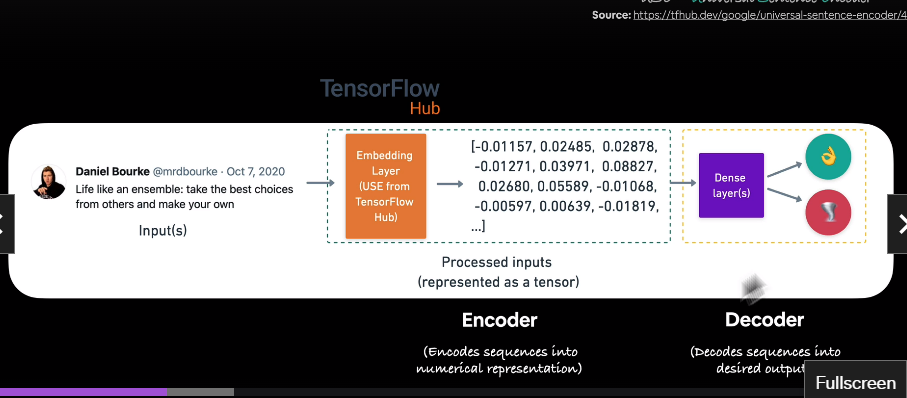

#Model 6:Tensorflow hub pretraines sentence encoder

In [128]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [129]:
embed_samples=embed(["There's a flood in my street! ","When you can the universal sentence encoder on sentence, it turns into numbers."])
embed_samples.shape

TensorShape([2, 512])

In [130]:
embed_samples[0,:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01157028,  0.0248591 ,  0.02878048, -0.012715  ,  0.03971538,
        0.0882776 ,  0.02680984,  0.05589836, -0.0106873 , -0.00597291,
        0.00639323, -0.01819518,  0.00030813,  0.09105888,  0.05874644,
       -0.03180628,  0.01512474, -0.05162929,  0.00991367, -0.06865347,
       -0.04209306,  0.02678981,  0.03011006,  0.00321069, -0.00337973,
       -0.04787357,  0.0226672 , -0.00985925, -0.04063613, -0.01292092,
       -0.04666384,  0.05630299, -0.03949255,  0.00517686,  0.02495829,
       -0.0701444 ,  0.02871508,  0.04947684, -0.00633979, -0.08960192,
        0.02807118, -0.00808364, -0.01360602,  0.0599865 , -0.10361787,
       -0.05195374,  0.00232954, -0.02332531, -0.03758105,  0.03327728],
      dtype=float32)>

In [131]:
embed_samples1=embed([text_vectorization("When you can the universal sentence encoder on sentence, it turns into numbers.")])
embed_samples1.shape

UnimplementedError: ignored

In [132]:
# tf.compat.v1.enable_eager_execution(
#     config=None, device_policy=None, execution_mode=None
# )

In [166]:
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[],
                                      # output_shape=[None,15,512],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="USE" #Universal Sentence ENcoder
                                      )

In [164]:
# #Create model using sequential api
# inputs=layers.Input(shape=(1,), dtype=("string"))

# outputs=layers.Dense(1,activation="sigmoid")
# model_6=tf.keras.Model(inputs,outputs,name="model_6_pretrained")

In [214]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128,activation="leaky_relu"),
    # layers.Dropout(0.6),
    layers.Dense(128,activation="leaky_relu"),
    # layers.Dropout(0.6),
    layers.Dense(32,activation="leaky_relu"),
    # layers.Dropout(0.6),
    layers.Dense(1,activation="sigmoid")
    ],name="model_6_USE")


In [215]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_47 (Dense)            (None, 128)               65664     
                                                                 
 dense_48 (Dense)            (None, 128)               16512     
                                                                 
 dense_49 (Dense)            (None, 32)                4128      
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256,884,161
Trainable params: 86,337
Non-trainable params: 256,797,824
_________________________________________________________________


In [216]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"],
                experimental_run_tf_function=False)

In [217]:
model_6_history=model_6.fit(X_train,
            y_train,
            epochs=15,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_6_pretrained")])

Saving TensorBoard log files to: model_logs/model_6_pretrained/20230527-070738
Epoch 1/15
215/215 [==============================] - 7s 19ms/step - loss: 0.6320 - accuracy: 0.7273 - val_loss: 0.5260 - val_accuracy: 0.7887
Epoch 2/15
215/215 [==============================] - 3s 14ms/step - loss: 0.4544 - accuracy: 0.8022 - val_loss: 0.4470 - val_accuracy: 0.8018
Epoch 3/15
215/215 [==============================] - 3s 14ms/step - loss: 0.4141 - accuracy: 0.8171 - val_loss: 0.4351 - val_accuracy: 0.8097
Epoch 4/15
215/215 [==============================] - 4s 19ms/step - loss: 0.3997 - accuracy: 0.8248 - val_loss: 0.4296 - val_accuracy: 0.8084
Epoch 5/15
215/215 [==============================] - 3s 14ms/step - loss: 0.3905 - accuracy: 0.8302 - val_loss: 0.4261 - val_accuracy: 0.8123
Epoch 6/15
215/215 [==============================] - 3s 14ms/step - loss: 0.3834 - accuracy: 0.8327 - val_loss: 0.4261 - val_accuracy: 0.8176
Epoch 7/15
215/215 [==============================] - 3s 14ms/s

In [218]:
model_6_pred_probs=model_6.predict(X_val)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.14333987],
       [0.80991924],
       [0.996222  ],
       [0.19715543],
       [0.66978896],
       [0.7623278 ],
       [0.98790073],
       [0.9901546 ],
       [0.9857544 ],
       [0.1077795 ]], dtype=float32)

In [219]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [220]:
model_6_results=calc_results(y_val,model_6_preds)

In [221]:
model_6_results,baseline_results

({'accuracy': 82.1522309711286,
  'precision': 0.8244694164885018,
  'recall': 0.821522309711286,
  'f1-score': 0.8199037266090726},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})